In [1]:
import pyodbc
import numpy as np
import matplotlib.pyplot as mp

In [30]:
%matplotlib inline

In [2]:
conn = pyodbc.connect(r'DRIVER={ODBC Driver 13 for SQL Server};'
                      r'SERVER=mpk4uitxo6.database.windows.net;'
                      r'DATABASE=Sensoria.Knowledge.Database.Live;'
                      r'UID=liveuser;'
                      r'PWD=7oHWE^Gcr834C*zH;')

In [3]:
cursor=conn.cursor()
cursor.execute("WITH cte AS(SELECT SessionId,Pace,Speed,[TelemetryTimeTick] AS Tick,GeoLocation as P1, LEAD(GeoLocation, 1) OVER (PARTITION BY SessionId ORDER BY [TelemetryTimeTick]) as P2,LEAD([TelemetryTimeTick], 1) OVER (PARTITION BY SessionId ORDER BY [TelemetryTimeTick]) as T2 FROM dbo.[Sessions.TelemetryData])select Pace,60/(P1.STDistance(P2)*3.6)from cte where SessionId=126066 order by Tick")
rowsPlane = cursor.fetchall()

In [20]:
paceSensors=[]
paceGPS=[]
for i in range(len(rowsPlane)):
    if rowsPlane[i][0] is not None:
        paceSensors=np.append(paceSensors,float(rowsPlane[i][0]))
    else: 
        paceSensors=np.append(paceSensors,0)
    if rowsPlane[i][1] is not None:
        paceGPS=np.append(paceGPS,float(rowsPlane[i][1]))
    else:
        paceGPS=np.append(paceGPS,0)

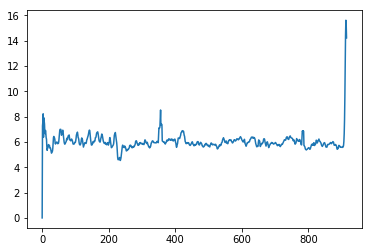

In [31]:
mp.plot(range(len(paceSensors)),paceSensors)

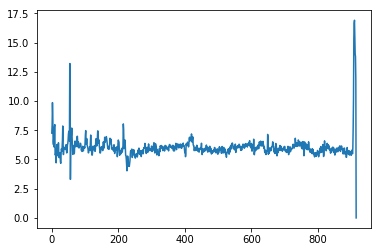

In [32]:
mp.plot(range(len(paceGPS)),paceGPS)

In [29]:
mp.show()

In [33]:
listaPace=list()
iNull=np.array([])
iNonNull=np.array([])
contRow=0
for i in range(len(rowsPlane)):
    if rowsPlane[i][1] is None:
        iNull=np.append(iNull,contRow)
        contRow+=1
    else:
        listaPace.append(float(rowsPlane[i][1]))
        iNonNull=np.append(iNonNull,contRow)
        contRow+=1
arrayPace=np.asarray(listaPace)
outHigh=np.where(arrayPace>np.percentile(arrayPace,75)+3*(np.percentile(arrayPace,75)-np.percentile(arrayPace,25)))#anomali
outLow=np.where(arrayPace<np.percentile(arrayPace,25)-3*(np.percentile(arrayPace,75)-np.percentile(arrayPace,25)))#anomali
#print(np.percentile(arr,25)-3*(np.percentile(arr,75)-np.percentile(arr,25)))
#whereArr=np.where(arr>np.percentile(arr,75)+1.5*(np.percentile(arr,75)-np.percentile(arr,25))) estremi
outlierHigh=iNonNull[outHigh[0]]
outlierLow=iNonNull[outLow[0]]
out=np.array([])
out=np.append(out,iNull)
out=np.append(out,outlierLow)
out=np.append(out,outlierHigh)
outlier=np.sort(out)  
dist=np.array([])
for g in range(len(outlier)-1):
    dist=np.append(dist,outlier[g+1]-outlier[g])
hole=np.array([])
for u in range(len(dist)):
    if dist[u]>5:
        hole=np.append(hole,u)
if len(hole)>0:
    firstGroup=outlier[0:int(hole[0])+1]
    if firstGroup[0]<contRow/100:
        firstElement=firstGroup[-1]+1
    else:
        firstElement=0
    lastGroup=outlier[int(hole[-1])+1:]
    if (contRow-1)-lastGroup[-1]<contRow/100:
        lastElement=lastGroup[0]-1
    else:
        lastElement=contRow-1
    print("lungo:",contRow," inizia da:",firstElement," fino a:",lastElement)#firstGroup,lastGroup
else:
    if outlier[0]<contRow/100:
        firstElement=outlier[-1]+1
        lastElement=contRow-1
    elif (contRow-1)-outlier[-1]<contRow/100:
        lastElement=outlier[0]-1
        firstElement=0
    else:
        firstElement=0
        lastElement=contRow-1
    print("lungo:",contRow," inizia da:",firstElement," fino a:",lastElement)#outlier
print(outlier)
#partendo da elemento zero, quindi riferimento a sql bisogna aggiungere uno
print("parti da Tick:",firstElement+1, "fino a:", lastElement+1)

lungo: 916  inizia da: 10.0  fino a: 905.0
[   1.    2.    3.    8.    9.   33.   54.   55.   56.   60.  215.  216.
  226.  906.  907.  908.  909.  910.  911.  912.  913.  914.  915.]
